# 附录C-量化统计分析及指标应用

In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
import warnings; warnings.filterwarnings('ignore')

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy
abupy.env.enable_example_env_ipython()

enable example env will only read RomDataBu/df_kl.h5


## C.1 量化统计分析应用

[abu量化系统github地址](https://github.com/bbfamily/abu) (您的star是我的动力！)

[abu量化文档教程ipython notebook](https://github.com/bbfamily/abu/tree/master/abupy_lecture)

本节内容建议对照阅读abu量化文档：第13节 量化技术分析应用

In [2]:
from abupy import ABuSymbolPd
tsla_df = ABuSymbolPd.make_kl_df('usTSLA', n_folds=2)
tsla_df.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,2568498,20160720,2,499,9.1923,8.7234
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,4428651,20160721,3,500,9.1711,8.7251
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,2579692,20160722,4,501,9.1858,8.7790
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,4490683,20160725,0,502,9.2669,8.9298
2016-07-26,225.93,228.740,225.63,-1.77,227.34,230.01,41833,20160726,1,503,9.1337,8.7541


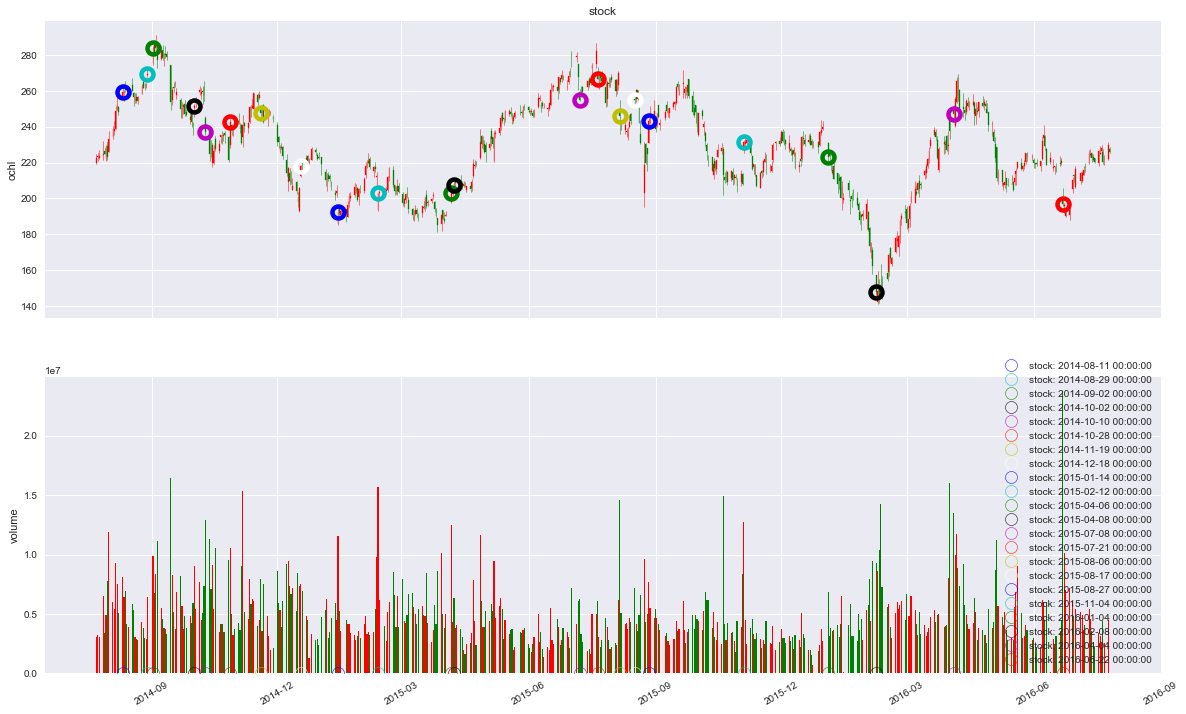

In [3]:
from abupy import tl
jumps = tl.jump.calc_jump(tsla_df)

In [4]:
jumps

,abs_pct_change,atr14,atr21,close,date,date_week,high,jump,jump_diff,jump_power,jump_threshold,key,low,open,p_change,pre_close,volume
2014-08-11,4.51,9.7572,9.6455,259.32,2.0141e+07,0.0,263.740,1.0,4.2314,1.6236,1.7053,13.0,255.00,255.480,4.51,248.13,8.1013e+06
2014-08-29,2.21,7.7374,8.1754,269.70,2.0141e+07,4.0,272.000,1.0,2.9458,1.2390,1.1164,27.0,267.51,268.700,2.21,263.86,6.4540e+06
2014-09-02,5.35,8.6868,8.7875,284.12,2.0141e+07,1.0,284.890,1.0,3.0110,1.5277,1.1164,28.0,274.30,275.500,5.35,269.70,9.8524e+06
2014-10-02,4.65,10.1352,10.0603,251.42,2.0141e+07,3.0,252.790,1.0,4.6895,1.0918,1.9520,50.0,245.36,250.200,4.65,240.24,9.0020e+06
2014-10-10,7.82,11.3338,10.8987,236.91,2.0141e+07,4.0,245.890,-1.0,5.0168,2.2165,1.9520,56.0,235.20,244.640,-7.82,257.01,1.2898e+07
2014-10-28,9.52,11.4392,11.2590,242.77,2.0141e+07,1.0,244.600,1.0,4.5472,1.4470,2.0513,68.0,228.25,229.600,9.52,221.67,1.0516e+07
2014-11-19,3.87,9.8175,10.1816,247.74,2.0141e+07,2.0,251.880,-1.0,5.0492,1.1527,1.9593,84.0,245.60,250.610,-3.87,257.70,7.9185e+06
2014-12-18,6.04,10.9454,10.7113,218.26,2.0141e+07,3.0,218.440,1.0,3.8932,1.5360,1.8915,104.0,211.80,212.380,6.04,205.82,7.4833e+06
2015-01-14,5.66,9.4215,9.5509,192.69,2.0150e+07,2.0,195.200,-1.0,3.0214,2.9953,1.4793,121.0,185.00,185.830,-5.66,204.25,1.1552e+07
2015-02-12,4.66,9.9740,9.7817,202.88,2.0150e+07,3.0,203.088,-1.0,3.7225,2.6090,1.7493,141.0,193.28,193.570,-4.66,212.80,1.5650e+07


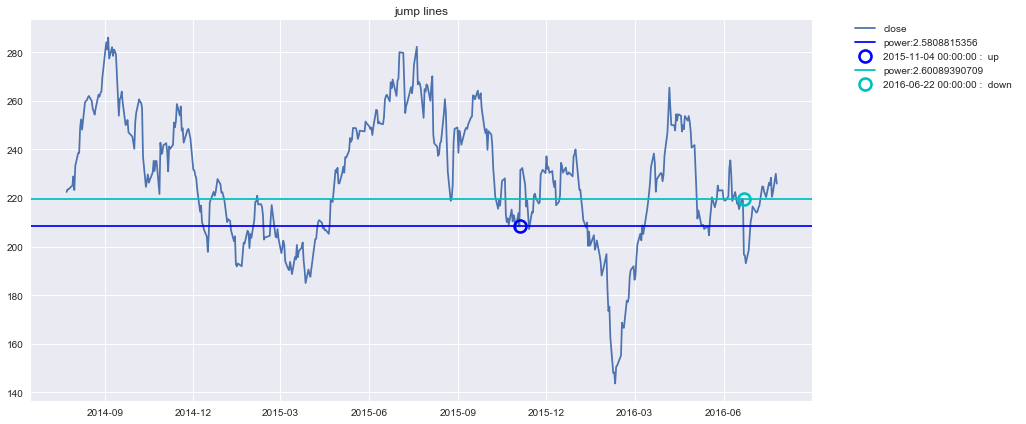

In [5]:
# sw[0]代表非时间因素的jump_power，sw[1]代表时间加权因素的jump_power，当sw[0]=1时与非加权方式相同，具体实现请参考源代码  
jump_pd = tl.jump.calc_jump_line_weight(tsla_df, sw=(0.5, 0.5))

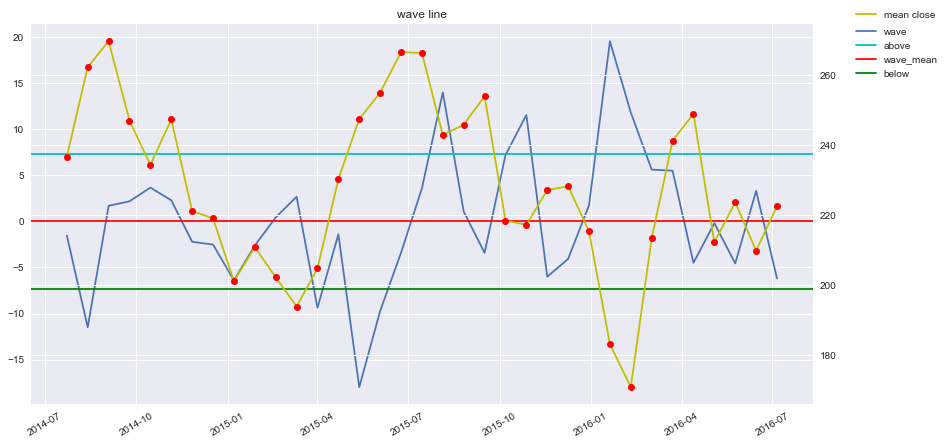

demean sum change wave: now:-6.19228571428571 below:-7.3250385023714655 above:7.32503850237148

In [6]:
tl.wave.calc_wave_abs(tsla_df, xd=21, show=True)

## C.2 量化技术指标应用: 对量化策略失败结果的人工分析

In [7]:
from abupy import EStoreAbu, abu

abu_result_tuple_train = abu.load_abu_result_tuple(n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, 
                                         custom_name='train_cn')

# 只筛选orders中有交易结果的单子
has_result = abu_result_tuple_train.orders_pd[
    abu_result_tuple_train.orders_pd.result == -1]

# 随便拿一个交易数据作为示例
sample_order = has_result.ix[100]

please wait! load_pickle....: /Users/Bailey/abu/data/cache/n5_train_cn_capital
please wait! load_pickle....: /Users/Bailey/abu/data/cache/n5_train_cn_benchmark


In [9]:
abupy.env.disable_example_env_ipython()

disable example env


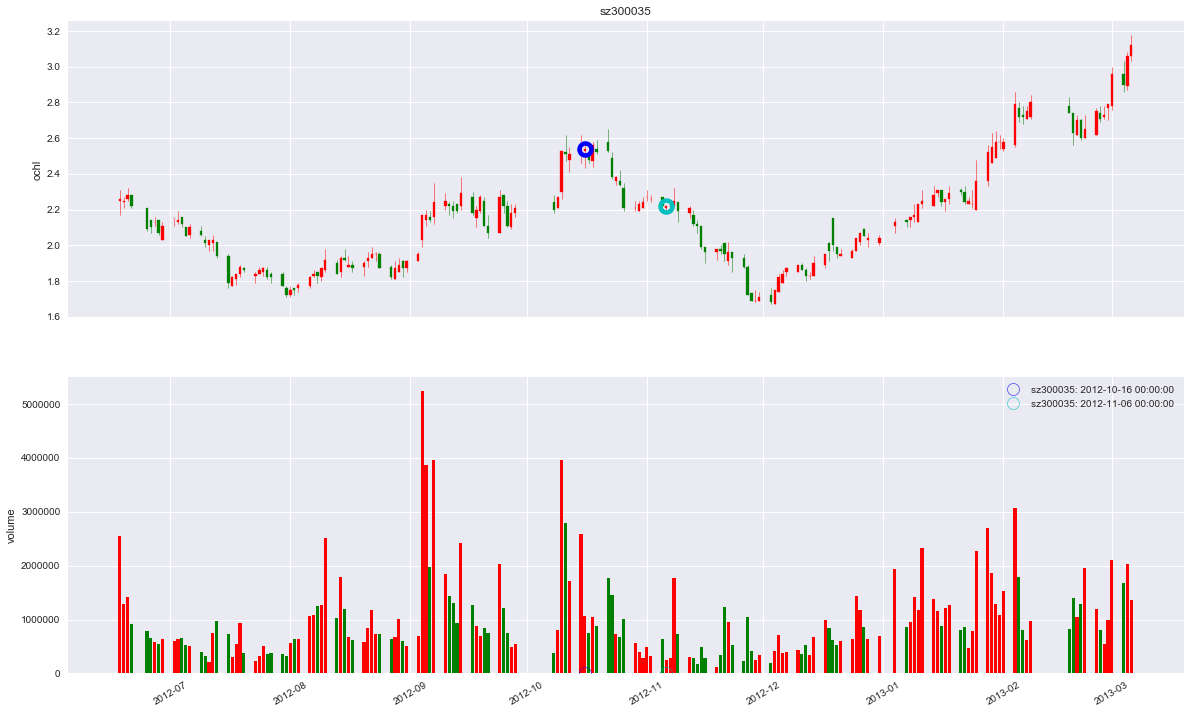

In [10]:
from abupy import ABuMarketDrawing
_ = ABuMarketDrawing.plot_candle_from_order(sample_order)

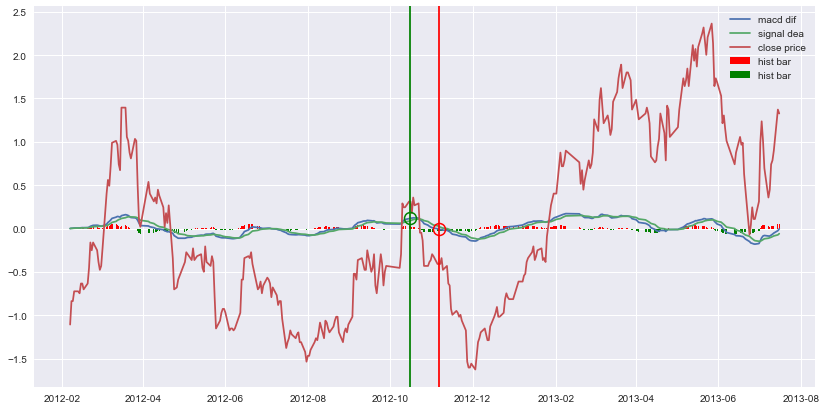

In [11]:
from abupy import nd
nd.macd.plot_macd_from_order(sample_order, date_ext=252)

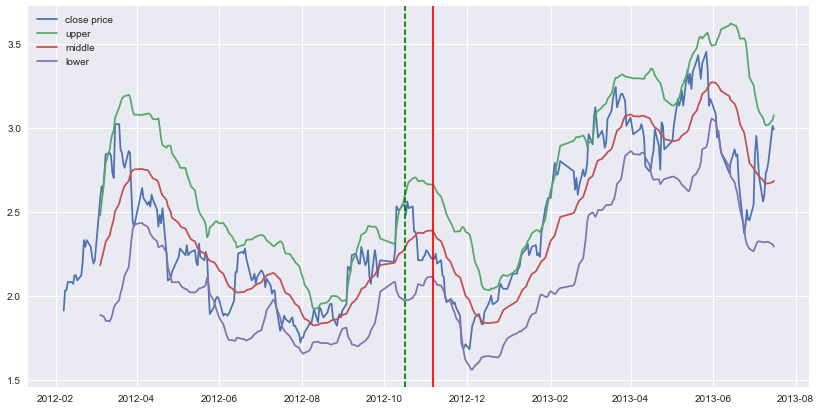

In [12]:
nd.boll.plot_boll_from_order(has_result.ix[100], date_ext=252)

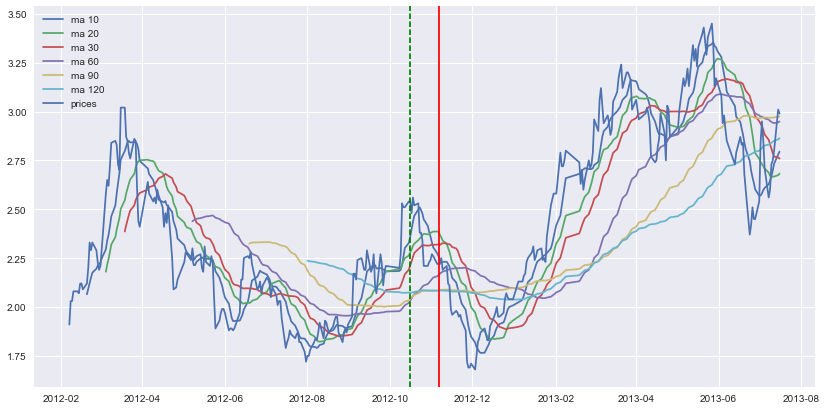

In [13]:
nd.ma.plot_ma_from_order(has_result.ix[100], date_ext=252, time_period=[10, 20, 30, 60, 90, 120])